In [1]:
#The dataset used is from https://www.kaggle.com/luthfim/steam-reviews-dataset
#Importing the needed libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mlt

In [2]:
#Load the csv into a dataframe
raw_review_df = pd.read_csv('steam_reviews.csv')
raw_review_df['date_posted'] = pd.to_datetime(raw_review_df['date_posted'],format='%Y-%m-%d')

#The first step is to isolate the positive and negative reviews as columns for future use 
raw_review_df['postive_review'] = [True if status == 'Recommended' else False for status in raw_review_df['recommendation']]
raw_review_df['negative_review'] = [True if status == 'Not Recommended' else False for status in raw_review_df['recommendation']]

#Get the unique games in the dataset
title_list = list(raw_review_df['title'].unique())

In [32]:
#These lines prepare the data into more distinct groupings

stats_by_year = raw_review_df.groupby(raw_review_df['date_posted'].dt.year).sum()
stats_by_month = raw_review_df.groupby(raw_review_df['date_posted'].dt.month).sum()
stats_by_year_by_month = raw_review_df.groupby([raw_review_df['date_posted'].dt.year,raw_review_df['date_posted'].dt.month]).sum()

reviews_overtime = raw_review_df.groupby(raw_review_df['date_posted']).sum()
reviews_overtime_per_game = raw_review_df.groupby([raw_review_df['date_posted'],'title']).sum()
reviews_overtime_per_game_cleaned = reviews_overtime_per_game.drop(columns=['funny','helpful','hour_played'])
reviews_overtime_cleaned = reviews_overtime.drop(columns=['funny','helpful','hour_played'])

reviews_per_game = raw_review_df.groupby(by = 'title').sum()
reviews_per_year = stats_by_year[['postive_review','negative_review']]
games_positive_negative_review =reviews_per_game[['postive_review','negative_review']]

In [35]:
# Main function to call other parts of the program
def main():
    menu()
    user_input = ''
    user_input = input('Make your choice: ')
    if user_input == '1':
        plot_reviews_over_time()
    elif user_input == '2':
        plot_game_reviews()
    elif user_input == '3':
        plot_reviews_per_year()
    elif user_input == '4':
        year = int(input(print('Enter a year from 2010 to 2019: ')))
        plot_review_single_year(year)
    elif user_input == '5':
        title = input(print('Enter a title from the list printed early exactly as it was printed: '))
        plot_single_game_reviews(title)
    else:
        print('Thank you for you time')

#This is User instructions
def menu():
    print('Welcome to the Steam Reviews Machine')
    print('This covers data reviews from Steam\'s best selling games from December 2010 to February 2019')
    print('The following will print the list of games in this dataset:')
    print()
    print_game_list()
    print()
    print('Press 1 to get an overview of the positive and negative reviews over the time period')
    print()
    print('Press 2 to get the total number of positive and negative reviews per game')
    print()
    print('Press 3 to get a plot the total number of reviews per year')
    print()
    print('Press 4 to get the total number of reviews in a single year')
    print()
    print('Press 5 to get the positive and negative reviews for a single game')
    print()
    
#Continues user input after one rotation of the functions for more examination
def double_check():
    status = input('Would you like to see more? Y/N: ')
    if status == 'Y' or status == 'y':
        main()
    else:
        print()
        print('Thank you for you time')
        

def plot_reviews_over_time():
    plt.figure(figsize=(16,9))
    reviews_overtime_cleaned.plot(subplots=True)
    plt.show()
    double_check()
    
def plot_game_reviews():
    plt.figure(figsize=(16,9))
    games_positive_negative_review.plot.bar(subplots=True)
    plt.show()
    double_check()
    
def plot_single_game_reviews(title):
    plt.figure(figsize=(16,9))
    games_positive_negative_review.loc[title].plot.bar()
    plt.show()
    double_check()
    
def plot_reviews_per_year():
    plt.figure(figsize=(16,9))
    reviews_per_year.plot()
    plt.show()
    double_check()

def plot_review_single_year(year):
    plt.figure(figsize=(16,9))
    reviews_per_year.loc[year].plot.bar()
    plt.show()
    double_check()

# This prints the list of unique games for the user to copy and paste into the user input    
def print_game_list():
    for each in title_list:
        print(each)

Welcome to the Steam Reviews Machine
This covers data reviews from Steam's best selling games from December 2010 to February 2019
The following will print the list of games in this dataset:

Expansion - Hearts of Iron IV: Man the Guns
Dead by Daylight
Wargroove
Wallpaper Engine
Factorio
Insurgency: Sandstorm
Cold Waters
Tannenberg
Pathfinder: Kingmaker
MONSTER HUNTER: WORLD
Divinity: Original Sin 2 - Definitive Edition
Football Manager 2019
Garry's Mod
Survivor Pass: Vikendi
Moonlighter
Terraria
GOD EATER 3
Sid Meier’s Civilization® VI
Rocket League®
Subnautica: Below Zero
Tom Clancy's Rainbow Six® Siege
ASTRONEER
Sid Meier’s Civilization® VI: Rise and Fall
Kenshi
Euro Truck Simulator 2
Grand Theft Auto V
RimWorld
NBA 2K19
RESIDENT EVIL 2 / BIOHAZARD RE:2
Slay the Spire
My Time At Portia
Foundation
Beat Saber
Sid Meier's Civilization® VI: Gathering Storm
Stardew Valley
Farming Simulator 19
PLAYERUNKNOWN'S BATTLEGROUNDS
Overcooked! 2
Don't Starve Together
Rust
Subnautica
ACE COMBAT™ 7: 

<Figure size 1152x648 with 0 Axes>

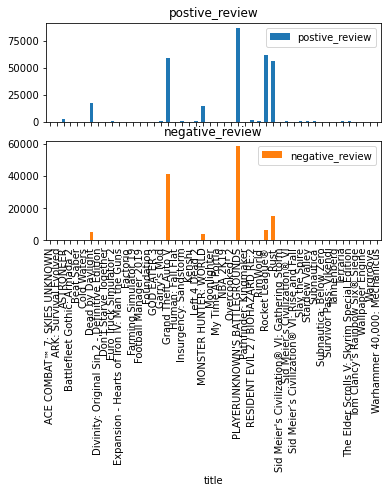

Would you like to see more? Y/N: Y
Welcome to the Steam Reviews Machine
This covers data reviews from Steam's best selling games from December 2010 to February 2019
The following will print the list of games in this dataset:

Expansion - Hearts of Iron IV: Man the Guns
Dead by Daylight
Wargroove
Wallpaper Engine
Factorio
Insurgency: Sandstorm
Cold Waters
Tannenberg
Pathfinder: Kingmaker
MONSTER HUNTER: WORLD
Divinity: Original Sin 2 - Definitive Edition
Football Manager 2019
Garry's Mod
Survivor Pass: Vikendi
Moonlighter
Terraria
GOD EATER 3
Sid Meier’s Civilization® VI
Rocket League®
Subnautica: Below Zero
Tom Clancy's Rainbow Six® Siege
ASTRONEER
Sid Meier’s Civilization® VI: Rise and Fall
Kenshi
Euro Truck Simulator 2
Grand Theft Auto V
RimWorld
NBA 2K19
RESIDENT EVIL 2 / BIOHAZARD RE:2
Slay the Spire
My Time At Portia
Foundation
Beat Saber
Sid Meier's Civilization® VI: Gathering Storm
Stardew Valley
Farming Simulator 19
PLAYERUNKNOWN'S BATTLEGROUNDS
Overcooked! 2
Don't Starve Toget

<Figure size 1152x648 with 0 Axes>

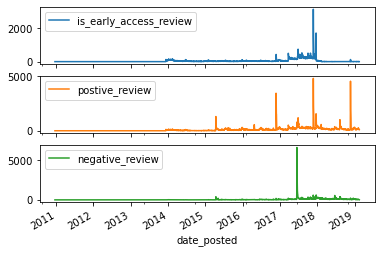

Would you like to see more? Y/N: n

Thank you for you time


In [34]:
main()